In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy
from scipy import stats

from scipy.stats import ttest_ind

# Equal Threshold: n=4 and empty=10%

In [29]:
#--------------------
#   Fazer as médias com todas as runs
#--------------------

read_overall = pd.read_csv('df_overall.csv', delimiter = ',')
#read_overall 

sum_up = pd.DataFrame(columns=[
                            'p_adap', 
                            'seg_pop_initial',
                            'seg_pop_final', 
                            'seg_threshold_initial',
                            'seg_threshold_final',
                            'mean_final_threshold',
                            'mode_final_threshold',
                            '2nd_mode_final_threshold'])

yerr_pop_initial = []
yerr_thre_initial = []

yerr_pop_final = []
yerr_thre_final = []

for p in np.arange(0,1.05,0.1):
    p_overall = read_overall.loc[(read_overall['p_adap']<= p + 0.01) & (read_overall['p_adap']>= p - 0.01)]
    
    sum_up = sum_up.append({'p_adap':                   p, 
                            'seg_pop_initial':          p_overall['seg_pop_initial'].mean(),
                            'seg_pop_final':            p_overall['seg_pop_final'].mean(), 
                            'seg_threshold_initial':    p_overall['seg_threshold_initial'].mean(),
                            'seg_threshold_final':      p_overall['seg_threshold_final'].mean(),
                            'mean_final_threshold':     p_overall['mean_final_threshold'].mean(),
                            'mode_final_threshold':     p_overall['mode_final_threshold'].mean(),
                            '2nd_mode_final_threshold': p_overall['2nd_mode_final_threshold'].mean()
     },ignore_index=True)
    
    yerr_pop_initial.append(2*abs(p_overall['seg_pop_initial'].std())) 
    yerr_thre_initial.append(2*abs(p_overall['seg_threshold_initial'].std()))
    
    yerr_pop_final.append(2*abs(p_overall['seg_pop_final'].std())) 
    yerr_thre_final.append(2*abs(p_overall['seg_threshold_final'].std()))
    
sum_up

,p_adap,seg_pop_initial,seg_pop_final,seg_threshold_initial,seg_threshold_final,mean_final_threshold,mode_final_threshold,2nd_mode_final_threshold
0,0.0,0.052204,0.594453,0.111004,0.111004,3.60064,4.0,0.0
1,0.1,0.047896,0.582532,0.108583,0.095110,3.40032,4.0,0.0
2,0.2,0.042471,0.567581,0.107479,0.094633,3.21016,4.0,1.0
3,0.3,0.053387,0.545951,0.112771,0.108250,3.00152,4.0,1.0
4,0.4,0.047874,0.522017,0.109289,0.097820,2.79888,4.0,1.0
5,0.5,0.050991,0.487964,0.108226,0.099538,2.61120,4.0,1.0
6,0.6,0.053909,0.445229,0.108825,0.100752,2.39472,4.0,1.0
7,0.7,0.047806,0.419327,0.109474,0.102799,2.20584,1.0,4.0
8,0.8,0.053633,0.383111,0.109778,0.096191,1.99728,1.0,4.0
9,0.9,0.049949,0.327569,0.110644,0.087489,1.79088,1.0,4.0


In [30]:

for count, p in enumerate(np.arange(0,1.05,0.1)):
    print("--------------Probability: ", p)
    p_overall = read_overall.loc[(read_overall['p_adap']<= p + 0.01) & (read_overall['p_adap']>= p - 0.01)]
    
    
    # compare samples
    stat, p = ttest_ind(read_overall['seg_pop_initial'], p_overall['seg_pop_final'])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Same distributions (fail to reject H0)')
    else:
        print('Different distributions (reject H0)')

--------------Probability:  0.0
Statistics=-128.319, p=0.000
Different distributions (reject H0)
--------------Probability:  0.1
Statistics=-125.107, p=0.000
Different distributions (reject H0)
--------------Probability:  0.2
Statistics=-115.194, p=0.000
Different distributions (reject H0)
--------------Probability:  0.30000000000000004
Statistics=-108.575, p=0.000
Different distributions (reject H0)
--------------Probability:  0.4
Statistics=-107.351, p=0.000
Different distributions (reject H0)
--------------Probability:  0.5
Statistics=-98.905, p=0.000
Different distributions (reject H0)
--------------Probability:  0.6000000000000001
Statistics=-94.079, p=0.000
Different distributions (reject H0)
--------------Probability:  0.7000000000000001
Statistics=-70.599, p=0.000
Different distributions (reject H0)
--------------Probability:  0.8
Statistics=-71.538, p=0.000
Different distributions (reject H0)
--------------Probability:  0.9
Statistics=-64.027, p=0.000
Different distributions (

In [31]:
for count, p in enumerate(np.arange(0,1.05,0.1)):
    print("--------------Probability: ", p)
    p_overall = read_overall.loc[(read_overall['p_adap']<= p + 0.01) & (read_overall['p_adap']>= p - 0.01)]
    
    
    # compare samples
    stat, p = ttest_ind(read_overall['seg_threshold_initial'], p_overall['seg_threshold_final'])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Same distributions (fail to reject H0)')
    else:
        print('Different distributions (reject H0)')

--------------Probability:  0.0
Statistics=-0.347, p=0.730
Same distributions (fail to reject H0)
--------------Probability:  0.1
Statistics=4.085, p=0.000
Different distributions (reject H0)
--------------Probability:  0.2
Statistics=4.132, p=0.000
Different distributions (reject H0)
--------------Probability:  0.30000000000000004
Statistics=0.366, p=0.716
Same distributions (fail to reject H0)
--------------Probability:  0.4
Statistics=3.296, p=0.002
Different distributions (reject H0)
--------------Probability:  0.5
Statistics=2.765, p=0.008
Different distributions (reject H0)
--------------Probability:  0.6000000000000001
Statistics=2.474, p=0.016
Different distributions (reject H0)
--------------Probability:  0.7000000000000001
Statistics=1.718, p=0.091
Same distributions (fail to reject H0)
--------------Probability:  0.8
Statistics=3.594, p=0.001
Different distributions (reject H0)
--------------Probability:  0.9
Statistics=5.906, p=0.000
Different distributions (reject H0)
----

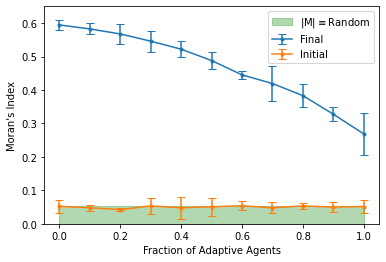

Lower bound:  0.04671690563967921
Upper bound:  0.053609151902337136


In [32]:
fig, ax = plt.subplots()

plt.errorbar(sum_up['p_adap'], sum_up['seg_pop_final'],   
             yerr = yerr_pop_final,
             capsize=4,
             marker='.',
             label='Final')

plt.errorbar(sum_up['p_adap'], sum_up['seg_pop_initial'], 
             yerr = yerr_pop_initial,
             capsize=4,
             marker='.',
             label='Initial')

ax.fill_between(sum_up['p_adap'], 
                -sum_up['seg_pop_initial'].mean() - sum_up['seg_pop_initial'].std(),
                sum_up['seg_pop_initial'].mean() + sum_up['seg_pop_initial'].std(),
                color= 'green',alpha= 0.3,label='|M|$\equiv$Random')

plt.xlabel('Fraction of Adaptive Agents')
plt.ylabel('Moran\'s Index')
plt.ylim(0,0.65)
plt.legend()
plt.show()


print("Lower bound: ", sum_up['seg_pop_initial'].mean() - sum_up['seg_pop_initial'].std() )
print("Upper bound: ", sum_up['seg_pop_initial'].mean() + sum_up['seg_pop_initial'].std() )

fig.savefig('EqualThreshold_SegPop.pdf', bbox_inches='tight', dpi=150)

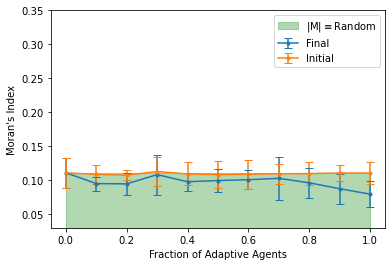

Lower bound:  0.1082073124189329
Upper bound:  0.11118111793341633


In [33]:
fig, ax = plt.subplots()

plt.errorbar(sum_up['p_adap'], sum_up['seg_threshold_final'],
            yerr = yerr_thre_final,
            capsize=4,
             marker='.',
            label='Final')

plt.errorbar(sum_up['p_adap'], sum_up['seg_threshold_initial'],
            yerr = yerr_thre_initial,
            capsize=4,
             marker='.',
            label='Initial')

ax.fill_between(sum_up['p_adap'], 
                -sum_up['seg_threshold_initial'].mean() - sum_up['seg_threshold_initial'].std(),
                sum_up['seg_threshold_initial'].mean() + sum_up['seg_threshold_initial'].std(),
                color= 'green',alpha= 0.3,label='|M|$\equiv$Random')

plt.xlabel('Fraction of Adaptive Agents')
plt.ylabel('Moran\'s Index')
plt.ylim(0.03,0.35)
plt.legend()
plt.show()

plt.show()
print("Lower bound: ", sum_up['seg_threshold_initial'].mean() - sum_up['seg_threshold_initial'].std() )
print("Upper bound: ", sum_up['seg_threshold_initial'].mean() + sum_up['seg_threshold_initial'].std() )

fig.savefig('EqualThreshold_SegThreshold.pdf', bbox_inches='tight', dpi=150)

# Different thresholds : $n \in [4,8]$ and empty=10%

In [39]:
#--------------------
#   Fazer as médias com todas as runs
#--------------------

read_overall_BroadenThres = pd.read_csv('df_overall_threshold.csv', delimiter = ',')
#read_overall 

sum_up_BroadenThres = pd.DataFrame(columns=[
                            'p_adap', 
                            'seg_pop_initial',
                            'seg_pop_final', 
                            'seg_threshold_initial',
                            'seg_threshold_final',
                            'mean_final_threshold',
                            'mode_final_threshold',
                            '2nd_mode_final_threshold'])

yerr_pop_initial = []
yerr_thre_initial = []

yerr_pop_final = []
yerr_thre_final = []

for p in np.arange(0,1.05,0.1):
    p_overall_BroadenThres = read_overall_BroadenThres.loc[(read_overall_BroadenThres['p_adap']<= p + 0.01) & (read_overall_BroadenThres['p_adap']>= p - 0.01)]
    
    sum_up_BroadenThres = sum_up_BroadenThres.append({'p_adap':                   p, 
                            'seg_pop_initial':          p_overall_BroadenThres['seg_pop_initial'].mean(),
                            'seg_pop_final':            p_overall_BroadenThres['seg_pop_final'].mean(), 
                            'seg_threshold_initial':    p_overall_BroadenThres['seg_threshold_initial'].mean(),
                            'seg_threshold_final':      p_overall_BroadenThres['seg_threshold_final'].mean(),
                            'mean_final_threshold':     p_overall_BroadenThres['mean_final_threshold'].mean(),
                            'mode_final_threshold':     p_overall_BroadenThres['mode_final_threshold'].mean(),
                            '2nd_mode_final_threshold': p_overall_BroadenThres['2nd_mode_final_threshold'].mean()
     },ignore_index=True)
    
    yerr_pop_initial.append(2*abs(p_overall_BroadenThres['seg_pop_initial'].std())) 
    yerr_thre_initial.append(2*abs(p_overall_BroadenThres['seg_threshold_initial'].std()))
    
    yerr_pop_final.append(2*abs(p_overall_BroadenThres['seg_pop_final'].std())) 
    yerr_thre_final.append(2*abs(p_overall_BroadenThres['seg_threshold_final'].std()))
    
sum_up_BroadenThres

,p_adap,seg_pop_initial,seg_pop_final,seg_threshold_initial,seg_threshold_final,mean_final_threshold,mode_final_threshold,2nd_mode_final_threshold
0,0.0,0.048798,0.376020,0.081002,0.106377,4.96184,5.8,5.4
1,0.1,0.052778,0.424469,0.075575,0.086810,4.58160,5.6,6.0
2,0.2,0.055858,0.410246,0.079407,0.101637,4.18048,4.8,5.4
3,0.3,0.056828,0.399092,0.081127,0.097990,3.80264,1.0,4.6
4,0.4,0.060434,0.369501,0.078856,0.095133,3.44448,1.0,4.6
5,0.5,0.049035,0.342065,0.078764,0.102365,3.08912,1.0,4.0
6,0.6,0.055909,0.332423,0.078029,0.120426,2.74496,1.0,4.0
7,0.7,0.057175,0.286419,0.083007,0.108011,2.39160,1.0,4.0
8,0.8,0.051856,0.279500,0.078023,0.108283,2.08304,1.0,3.2
9,0.9,0.048216,0.255973,0.072365,0.105036,1.78488,1.0,4.0


In [35]:
for count, p in enumerate(np.arange(0,1.05,0.1)):
    print("--------------Probability: ", p)
    p_overall = read_overall_BroadenThres.loc[(read_overall_BroadenThres['p_adap']<= p + 0.01) & (read_overall_BroadenThres['p_adap']>= p - 0.01)]
    
    
    # compare samples
    stat, p = ttest_ind(read_overall_BroadenThres['seg_pop_initial'], p_overall['seg_pop_final'])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Same distributions (fail to reject H0)')
    else:
        print('Different distributions (reject H0)')

--------------Probability:  0.0
Statistics=-67.384, p=0.000
Different distributions (reject H0)
--------------Probability:  0.1
Statistics=-72.591, p=0.000
Different distributions (reject H0)
--------------Probability:  0.2
Statistics=-64.058, p=0.000
Different distributions (reject H0)
--------------Probability:  0.30000000000000004
Statistics=-78.083, p=0.000
Different distributions (reject H0)
--------------Probability:  0.4
Statistics=-67.301, p=0.000
Different distributions (reject H0)
--------------Probability:  0.5
Statistics=-62.234, p=0.000
Different distributions (reject H0)
--------------Probability:  0.6000000000000001
Statistics=-64.147, p=0.000
Different distributions (reject H0)
--------------Probability:  0.7000000000000001
Statistics=-53.445, p=0.000
Different distributions (reject H0)
--------------Probability:  0.8
Statistics=-49.944, p=0.000
Different distributions (reject H0)
--------------Probability:  0.9
Statistics=-42.085, p=0.000
Different distributions (rejec

In [36]:
for count, p in enumerate(np.arange(0,1.05,0.1)):
    print("--------------Probability: ", p)
    p_overall = read_overall_BroadenThres.loc[(read_overall_BroadenThres['p_adap']<= p + 0.01) & (read_overall_BroadenThres['p_adap']>= p - 0.01)]
    
    
    # compare samples
    stat, p = ttest_ind(read_overall_BroadenThres['seg_threshold_initial'], p_overall['seg_threshold_final'])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Same distributions (fail to reject H0)')
    else:
        print('Different distributions (reject H0)')

--------------Probability:  0.0
Statistics=-6.803, p=0.000
Different distributions (reject H0)
--------------Probability:  0.1
Statistics=-1.967, p=0.054
Same distributions (fail to reject H0)
--------------Probability:  0.2
Statistics=-5.277, p=0.000
Different distributions (reject H0)
--------------Probability:  0.30000000000000004
Statistics=-4.543, p=0.000
Different distributions (reject H0)
--------------Probability:  0.4
Statistics=-3.823, p=0.000
Different distributions (reject H0)
--------------Probability:  0.5
Statistics=-5.098, p=0.000
Different distributions (reject H0)
--------------Probability:  0.6000000000000001
Statistics=-8.866, p=0.000
Different distributions (reject H0)
--------------Probability:  0.7000000000000001
Statistics=-6.322, p=0.000
Different distributions (reject H0)
--------------Probability:  0.8
Statistics=-6.517, p=0.000
Different distributions (reject H0)
--------------Probability:  0.9
Statistics=-5.884, p=0.000
Different distributions (reject H0)
-

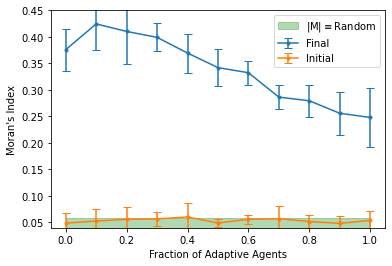

Lower bound:  0.04975723046806637
Upper bound:  0.05768110674175247


In [37]:
fig, ax = plt.subplots()

# plt.plot(sum_up_BroadenThres['p_adap'], sum_up_BroadenThres['seg_pop_final'],
#         marker='o',
#         label='Final')

plt.errorbar(sum_up_BroadenThres['p_adap'], sum_up_BroadenThres['seg_pop_final'], 
             yerr = yerr_pop_final,
             capsize=4,
             marker='.',
             label='Final')

# plt.plot(sum_up_BroadenThres['p_adap'], sum_up_BroadenThres['seg_pop_initial'],
#         marker='o',
#         label='Initial')

plt.errorbar(sum_up_BroadenThres['p_adap'], sum_up_BroadenThres['seg_pop_initial'], 
             yerr = yerr_pop_initial,
             capsize=4,
             marker='.',
             label='Initial')

ax.fill_between(sum_up_BroadenThres['p_adap'], 
                -sum_up_BroadenThres['seg_pop_initial'].mean() - sum_up_BroadenThres['seg_pop_initial'].std(),
                sum_up_BroadenThres['seg_pop_initial'].mean() + sum_up_BroadenThres['seg_pop_initial'].std(),
                color= 'green',alpha= 0.3,label='|M|$\equiv$Random')


plt.xlabel('Fraction of Adaptive Agents')
plt.ylabel('Moran\'s Index')
plt.ylim(0.04,0.45)
plt.legend()
plt.show()

print("Lower bound: ", sum_up_BroadenThres['seg_pop_initial'].mean() - sum_up_BroadenThres['seg_pop_initial'].std() )
print("Upper bound: ", sum_up_BroadenThres['seg_pop_initial'].mean() + sum_up_BroadenThres['seg_pop_initial'].std() )

fig.savefig('DifThreshold_SegPop.pdf', bbox_inches='tight', dpi=150)

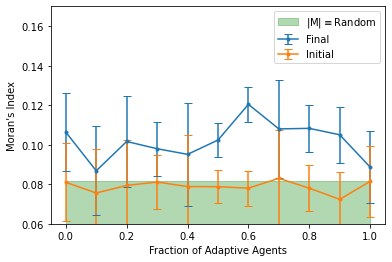

Lower bound:  0.07590173915329927
Upper bound:  0.08184706736046442


In [38]:
fig, ax = plt.subplots()

# plt.plot(sum_up_BroadenThres['p_adap'], sum_up_BroadenThres['seg_threshold_final'],
#         marker='o',
#         label='Final')

# plt.plot(sum_up_BroadenThres['p_adap'], sum_up_BroadenThres['seg_threshold_initial'],
#         marker='o',
#         label='Initial')

plt.errorbar(sum_up_BroadenThres['p_adap'], sum_up_BroadenThres['seg_threshold_final'], 
             yerr = yerr_pop_initial,
             capsize=4,
             marker='.',
             label='Final')

plt.errorbar(sum_up_BroadenThres['p_adap'], sum_up_BroadenThres['seg_threshold_initial'], 
             yerr = yerr_pop_initial,
             capsize=4,
             marker='.',
             label='Initial')

ax.fill_between(sum_up_BroadenThres['p_adap'], 
                -sum_up_BroadenThres['seg_threshold_initial'].mean() - sum_up_BroadenThres['seg_threshold_initial'].std(),
                sum_up_BroadenThres['seg_threshold_initial'].mean() + sum_up_BroadenThres['seg_threshold_initial'].std(),
                color= 'green',alpha= 0.3,label='|M|$\equiv$Random')


plt.xlabel('Fraction of Adaptive Agents')
plt.ylabel('Moran\'s Index')
plt.ylim(0.06,0.17)
plt.legend()
plt.show()


print("Lower bound: ", sum_up_BroadenThres['seg_threshold_initial'].mean() - sum_up_BroadenThres['seg_threshold_initial'].std() )
print("Upper bound: ", sum_up_BroadenThres['seg_threshold_initial'].mean() + sum_up_BroadenThres['seg_threshold_initial'].std() )

fig.savefig('DifThreshold_SegThreshold.pdf', bbox_inches='tight', dpi=150)

## Comparision of mean final thresholds for equal and dif thresholds 

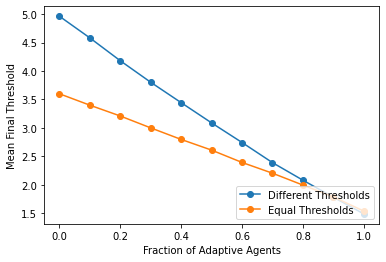

In [12]:
fig, ax = plt.subplots()

plt.plot(sum_up_BroadenThres['p_adap'], sum_up_BroadenThres['mean_final_threshold'],
        marker='o',
        label='Different Thresholds')

plt.plot(sum_up_BroadenThres['p_adap'], sum_up['mean_final_threshold'],
        marker='o',
        label='Equal Thresholds')



plt.xlabel('Fraction of Adaptive Agents')
plt.ylabel('Mean Final Threshold')

plt.legend(loc='lower right')
plt.show()

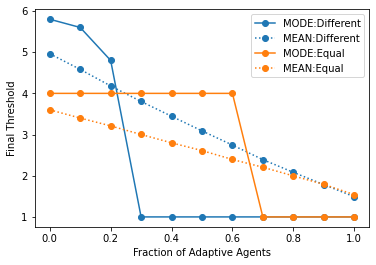

In [14]:
fig, ax = plt.subplots()

plt.plot(sum_up_BroadenThres['p_adap'], sum_up_BroadenThres['mode_final_threshold'],
        marker='o',
        label='MODE:Different')


plt.plot(sum_up_BroadenThres['p_adap'], sum_up_BroadenThres['mean_final_threshold'],
        marker='o', ls=':', c='#1f77b4',
        label='MEAN:Different')

plt.plot(sum_up_BroadenThres['p_adap'], sum_up['mode_final_threshold'],
        marker='o',
        label='MODE:Equal')

plt.plot(sum_up_BroadenThres['p_adap'], sum_up['mean_final_threshold'],
        marker='o', ls=':', c='#ff7f0e',
        label='MEAN:Equal')


plt.xlabel('Fraction of Adaptive Agents')
plt.ylabel('Final Threshold')

plt.legend()
plt.show()

fig.savefig('Comparing_MODEMEAN_EqualDif.pdf', bbox_inches='tight', dpi=150)

# Less Empty Places : $n = 4$ and empty=1%

In [45]:
#--------------------
#   Fazer as médias com todas as runs
#--------------------

read_overall_Empty = pd.read_csv('df_overall_empty.csv', delimiter = ',')
#read_overall 

sum_up_Empty = pd.DataFrame(columns=[
                            'p_adap', 
                            'seg_pop_initial',
                            'seg_pop_final', 
                            'seg_threshold_initial',
                            'seg_threshold_final',
                            'mean_final_threshold',
                            'mode_final_threshold',
                            '2nd_mode_final_threshold'])

yerr_pop_initial=[]
yerr_pop_final=[]

yerr_thre_initial=[]
yerr_thre_final=[]

for p in np.arange(0,1.05,0.1):
    p_overall_Empty = read_overall_Empty.loc[(read_overall_Empty['p_adap']>= p - 0.01) & (read_overall_Empty['p_adap']<= p + 0.01)]
    
    sum_up_Empty = sum_up_Empty.append({'p_adap':                   p, 
                            'seg_pop_initial':          p_overall_Empty['seg_pop_initial'].mean(),
                            'seg_pop_final':            p_overall_Empty['seg_pop_final'].mean(), 
                            'seg_threshold_initial':    p_overall_Empty['seg_threshold_initial'].mean(),
                            'seg_threshold_final':      p_overall_Empty['seg_threshold_final'].mean(),
                            'mean_final_threshold':     p_overall_Empty['mean_final_threshold'].mean(),
                            'mode_final_threshold':     p_overall_Empty['mode_final_threshold'].mean(),
                            '2nd_mode_final_threshold': p_overall_Empty['2nd_mode_final_threshold'].mean()
     },ignore_index=True)
    
    
    yerr_pop_initial.append(abs(p_overall_Empty['seg_pop_initial'].std())) 
    yerr_thre_initial.append(abs(p_overall_Empty['seg_threshold_initial'].std()))
    
    yerr_pop_final.append(abs(p_overall_Empty['seg_pop_final'].std())) 
    yerr_thre_final.append(abs(p_overall_Empty['seg_threshold_final'].std()))
    

sum_up_Empty

,p_adap,seg_pop_initial,seg_pop_final,seg_threshold_initial,seg_threshold_final,mean_final_threshold,mode_final_threshold,2nd_mode_final_threshold
0,0.0,0.001758,0.819133,0.011739,0.011739,3.95360,4.0,0.0
1,0.1,0.000597,0.803372,0.009612,0.030094,3.76344,4.0,1.0
2,0.2,0.004131,0.784299,0.009534,0.033623,3.55472,4.0,1.0
3,0.3,0.006337,0.742134,0.011248,0.035569,3.36384,4.0,1.0
4,0.4,-0.003175,0.739317,0.009939,0.045797,3.19360,4.0,1.0
5,0.5,0.000751,0.694042,0.009613,0.050030,2.97728,4.0,1.0
6,0.6,-0.005523,0.602193,0.010108,0.058816,2.73448,4.0,1.0
7,0.7,0.000073,0.567864,0.011332,0.049547,2.58912,4.0,1.0
8,0.8,-0.004826,0.513631,0.009206,0.048356,2.37136,1.0,4.0
9,0.9,0.007483,0.455443,0.010925,0.055774,2.12344,1.0,4.0


In [41]:
for count, p in enumerate(np.arange(0,1.05,0.1)):
    print("--------------Probability: ", p)
    p_overall = read_overall_Empty.loc[(read_overall_Empty['p_adap']<= p + 0.01) & (read_overall_Empty['p_adap']>= p - 0.01)]
    
    
    # compare samples
    stat, p = ttest_ind(read_overall_Empty['seg_pop_initial'], p_overall['seg_pop_final'])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Same distributions (fail to reject H0)')
    else:
        print('Different distributions (reject H0)')

--------------Probability:  0.0
Statistics=-165.613, p=0.000
Different distributions (reject H0)
--------------Probability:  0.1
Statistics=-160.393, p=0.000
Different distributions (reject H0)
--------------Probability:  0.2
Statistics=-168.139, p=0.000
Different distributions (reject H0)
--------------Probability:  0.30000000000000004
Statistics=-166.850, p=0.000
Different distributions (reject H0)
--------------Probability:  0.4
Statistics=-138.384, p=0.000
Different distributions (reject H0)
--------------Probability:  0.5
Statistics=-128.025, p=0.000
Different distributions (reject H0)
--------------Probability:  0.6000000000000001
Statistics=-90.520, p=0.000
Different distributions (reject H0)
--------------Probability:  0.7000000000000001
Statistics=-99.085, p=0.000
Different distributions (reject H0)
--------------Probability:  0.8
Statistics=-96.229, p=0.000
Different distributions (reject H0)
--------------Probability:  0.9
Statistics=-68.884, p=0.000
Different distributions 

In [42]:
for count, p in enumerate(np.arange(0,1.05,0.1)):
    print("--------------Probability: ", p)
    p_overall = read_overall_Empty.loc[(read_overall_Empty['p_adap']<= p + 0.01) & (read_overall_Empty['p_adap']>= p - 0.01)]
    
    
    # compare samples
    stat, p = ttest_ind(read_overall_Empty['seg_threshold_initial'], p_overall['seg_threshold_final'])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Same distributions (fail to reject H0)')
    else:
        print('Different distributions (reject H0)')

--------------Probability:  0.0
Statistics=-1.619, p=0.111
Same distributions (fail to reject H0)
--------------Probability:  0.1
Statistics=-10.831, p=0.000
Different distributions (reject H0)
--------------Probability:  0.2
Statistics=-13.241, p=0.000
Different distributions (reject H0)
--------------Probability:  0.30000000000000004
Statistics=-11.821, p=0.000
Different distributions (reject H0)
--------------Probability:  0.4
Statistics=-19.795, p=0.000
Different distributions (reject H0)
--------------Probability:  0.5
Statistics=-20.544, p=0.000
Different distributions (reject H0)
--------------Probability:  0.6000000000000001
Statistics=-21.890, p=0.000
Different distributions (reject H0)
--------------Probability:  0.7000000000000001
Statistics=-31.473, p=0.000
Different distributions (reject H0)
--------------Probability:  0.8
Statistics=-28.189, p=0.000
Different distributions (reject H0)
--------------Probability:  0.9
Statistics=-27.588, p=0.000
Different distributions (rej

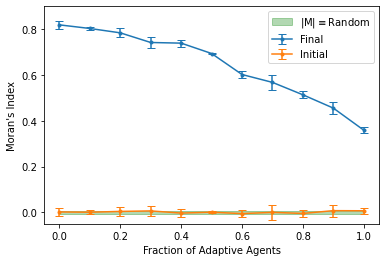

Lower bound:  -0.005889957893130605
Upper bound:  0.005889957893130605


In [43]:
fig, ax = plt.subplots()

# plt.plot(sum_up_Empty['p_adap'], sum_up_Empty['seg_pop_final'],
#         marker='o',
#         label='Final')

# plt.plot(sum_up_Empty['p_adap'], sum_up_Empty['sum_up_Empty'],
#         marker='o',
#         label='Initial')

plt.errorbar(sum_up_Empty['p_adap'], sum_up_Empty['seg_pop_final'], 
             yerr = yerr_pop_initial,
             capsize=4,
             marker='.',
             label='Final')

plt.errorbar(sum_up_Empty['p_adap'], sum_up_Empty['seg_pop_initial'], 
             yerr = yerr_pop_initial,
             capsize=4,
             marker='.',
             label='Initial')

ax.fill_between(sum_up_Empty['p_adap'], 
                -sum_up_Empty['seg_pop_initial'].mean() - sum_up_Empty['seg_pop_initial'].std(),
                sum_up_Empty['seg_pop_initial'].mean() + sum_up_Empty['seg_pop_initial'].std(),
                color= 'green',alpha= 0.3,label='|M|$\equiv$Random')


plt.xlabel('Fraction of Adaptive Agents')
plt.ylabel('Moran\'s Index')
plt.ylim(-0.05,0.9)
plt.legend()
plt.show()

print("Lower bound: ", -sum_up_Empty['seg_pop_initial'].mean() - sum_up_Empty['seg_pop_initial'].std() )
print("Upper bound: ", sum_up_Empty['seg_pop_initial'].mean() + sum_up_Empty['seg_pop_initial'].std() )


fig.savefig('Empty_SegPop.pdf', bbox_inches='tight', dpi=150)

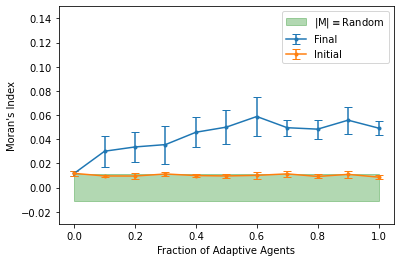

Lower bound:  -0.011167407594219242
Upper bound:  0.011167407594219242


In [46]:
fig, ax = plt.subplots()

# plt.plot(sum_up_Empty['p_adap'], sum_up_Empty['seg_threshold_final'],
#         marker='o',
#         label='Final')

# plt.plot(sum_up_Empty['p_adap'], sum_up_Empty['seg_threshold_initial'],
#         marker='o',
#         label='Initial')

plt.errorbar(sum_up_Empty['p_adap'], sum_up_Empty['seg_threshold_final'], 
             yerr = yerr_thre_final,
             capsize=4,
             marker='.',
             label='Final')

plt.errorbar(sum_up_Empty['p_adap'], sum_up_Empty['seg_threshold_initial'], 
             yerr = yerr_thre_initial,
             capsize=4,
             marker='.',
             label='Initial')

ax.fill_between(sum_up_Empty['p_adap'], 
                -sum_up_Empty['seg_threshold_initial'].mean() - sum_up_Empty['seg_threshold_initial'].std(),
                sum_up_Empty['seg_threshold_initial'].mean() + sum_up_Empty['seg_threshold_initial'].std(),
                color= 'green',alpha= 0.3,label='|M|$\equiv$Random')


plt.xlabel('Fraction of Adaptive Agents')
plt.ylabel('Moran\'s Index')
plt.ylim(-0.03,0.15)
plt.legend()
plt.show()


print("Lower bound: ", -sum_up_Empty['seg_threshold_initial'].mean() - sum_up_Empty['seg_threshold_initial'].std() )
print("Upper bound: ", sum_up_Empty['seg_threshold_initial'].mean() + sum_up_Empty['seg_threshold_initial'].std() )


fig.savefig('Empty_SegThreshold.pdf', bbox_inches='tight', dpi=150)

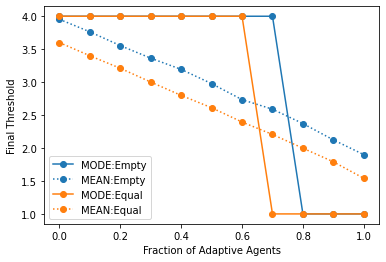

In [23]:
fig, ax = plt.subplots()

plt.plot(sum_up_Empty['p_adap'], sum_up_Empty['mode_final_threshold'],
        marker='o',
        label='MODE:Empty')


plt.plot(sum_up_Empty['p_adap'], sum_up_Empty['mean_final_threshold'],
        marker='o', ls=':', c='#1f77b4',
        label='MEAN:Empty')

plt.plot(sum_up_Empty['p_adap'], sum_up['mode_final_threshold'],
        marker='o',
        label='MODE:Equal')

plt.plot(sum_up_Empty['p_adap'], sum_up['mean_final_threshold'],
        marker='o', ls=':', c='#ff7f0e',
        label='MEAN:Equal')


plt.xlabel('Fraction of Adaptive Agents')
plt.ylabel('Final Threshold')

plt.legend()
plt.show()

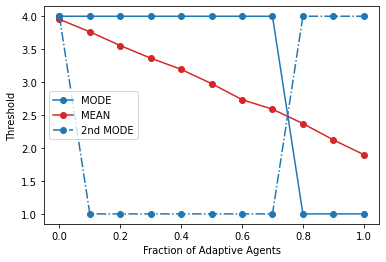

In [22]:
fig, ax = plt.subplots()

plt.plot(sum_up_Empty['p_adap'], sum_up_Empty['mode_final_threshold'],
        marker='o',
        label='MODE')

plt.plot(sum_up_Empty['p_adap'], sum_up_Empty['mean_final_threshold'],
        marker='o', ls='-', c='tab:red',
        label='MEAN')


sum_up_Empty.at[0,'2nd_mode_final_threshold'] = 4
plt.plot(sum_up_Empty['p_adap'], sum_up_Empty['2nd_mode_final_threshold'],
        marker='o', ls='-.', c='#1f77b4',
        label='2nd MODE')

plt.xlabel('Fraction of Adaptive Agents')
plt.ylabel('Threshold')


plt.legend()

plt.show()

fig.savefig('MODEMEAN_Empty.pdf', bbox_inches='tight', dpi=150)